# Distribution of Data Visualization  

In this notebook i will trying to create visualization of data distribution. This visualization would be useful to know how the distribution of the data. The outline of this notebook following Seaborn tutorial that provided by seaborn developer.

# Outline
1. Histogram
    - Basic Histogram
    - Conditioning on other variables
    - Normalized histogram statistics
2. Kernel Density Estimation (KDE)
    - Basic KDE 
    - Conditioning on other variables
3. Empirical Cumulative Distributive Function
4. Bivariate Distribution
    - Create Heatmap
    - Create Contour Map
5. Other Distribution of Data Visualization
    - Create Plotting Joint
    - Create Many Distribution Using pairplot()

## Data Preparation

In [1]:
# import module
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
# load the dataset
df_mpg = pd.read_csv('mpg.csv')
df_iris = pd.read_csv('iris.csv')
df_happ = pd.read_csv('world-happiness-report.csv')

In [5]:
# show subset of mpg dataset
df_mpg.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [6]:
# show subset of iris dataset
df_iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [9]:
# show subset of world happiness report  dataset
df_happ.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

# 1. Histogram

### Basic Histogram

Basic Syntax :
`sns.displot(penguins, x="flipper_length_mm")`

Text(0.5, 1.0, 'Petal Width (cm) Distribution')

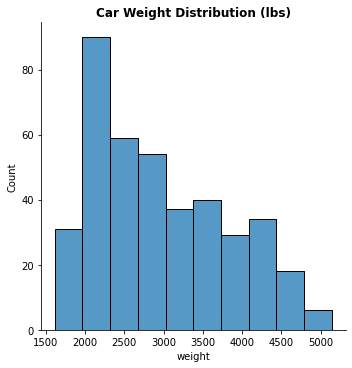

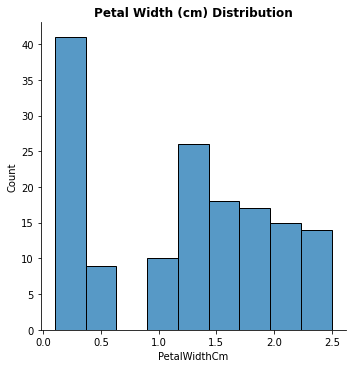

In [19]:
# practice 1 visualize data distribution of weight cars 
sns.displot(df_mpg, x='weight')
plt.title('Car Weight Distribution (lbs)', fontweight='bold')

# practice 2 visualize data distribution of PetalWidthCm of flowers 
sns.displot(df_iris, x='PetalWidthCm')
plt.title('Petal Width (cm) Distribution', fontweight='bold')

#### Choosing the Bin size
Automatically, seaborn module will selecting bin size based on variance values that features has. But, for some occasion that thing could caused a misleading for people who seen it. Binsize on histogrm can be configured with binwidth parameter.

Text(0.5, 1.0, 'Social Support')

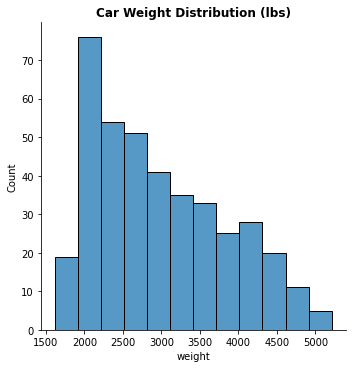

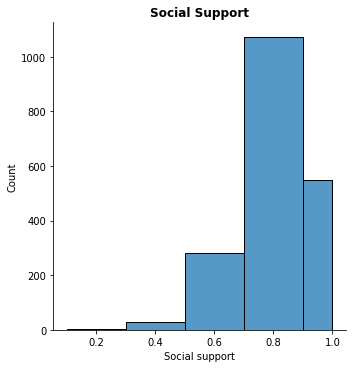

In [21]:
# practice 1 visualize data distribution of weight cars 
sns.displot(df_mpg, x='weight', binwidth = 300) # bindwidth use for setting how big width of each bar 
plt.title('Car Weight Distribution (lbs)', fontweight='bold')

# practice 2 visualize data distribution of weight cars 
sns.displot(df_happ, x='Social support', bins = [0.1, 0.3, 0.5, 0.7, 0.9, 1]) # binsize use to visualize histogram with selected bins
plt.title('Social Support', fontweight='bold')


#### Histogram Conditioning on Other Variables

Means that visualizes the histogram with classification of an categorical values. It can be made on seaborn modul by adding parameter `hue`. `hue` parameter can be filled with categorical features

Text(0.5, 1.0, 'Petal Width (cm) Distribution Between Each Species Dodged')

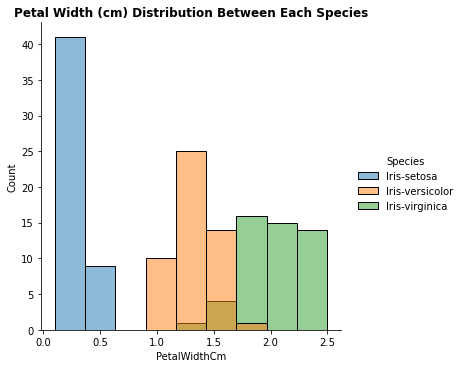

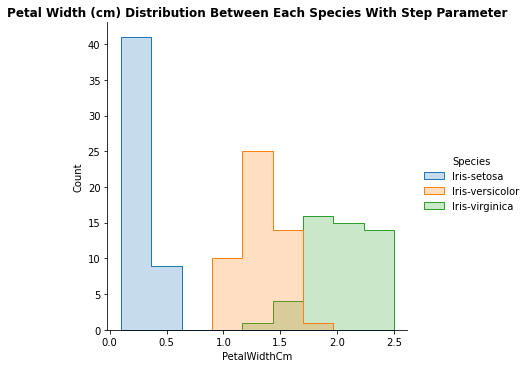

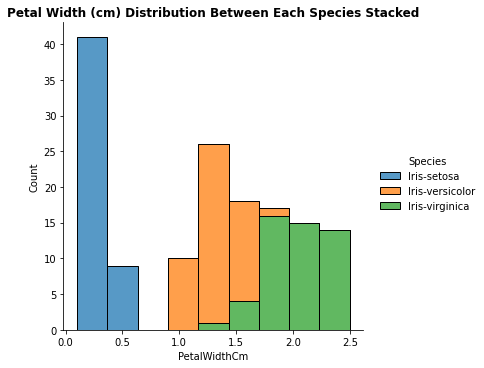

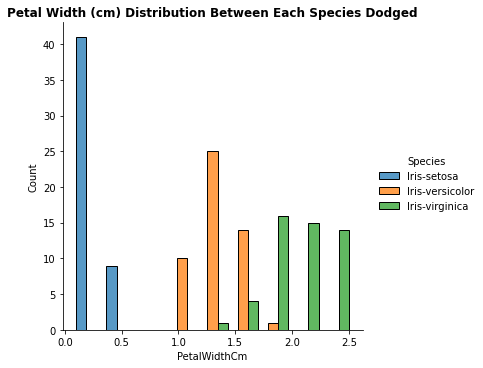

In [25]:
# practice 1 visualize data distribution of PetalWidthCm of flowers for each species
sns.displot(df_iris, x='PetalWidthCm', hue = 'Species')
plt.title('Petal Width (cm) Distribution Between Each Species',  fontweight='bold')

# practice 2 visualize data distribution of PetalWidthCm of flowers for each species with step parameter
sns.displot(df_iris, x='PetalWidthCm', hue = 'Species', element='step') # element step help distinguish overlayered bar
plt.title('Petal Width (cm) Distribution Between Each Species With Step Parameter',  fontweight='bold')

# practice 3 visualize data distribution of PetalWidthCm of flowers for each species with step parameter
sns.displot(df_iris, x='PetalWidthCm', hue = 'Species', multiple='stack') # element stack help distinguish overlayed bar by stacked each distribution differed by category 
plt.title('Petal Width (cm) Distribution Between Each Species Stacked',  fontweight='bold')

# practice 4 visualize data distribution of PetalWidthCm of flowers for each species with step parameter
sns.displot(df_iris, x='PetalWidthCm', hue = 'Species', multiple='dodge') # differentiate distribution of each category by giving distance 
plt.title('Petal Width (cm) Distribution Between Each Species Dodged',  fontweight='bold')



#### Multiple Histogram with Facet Grid

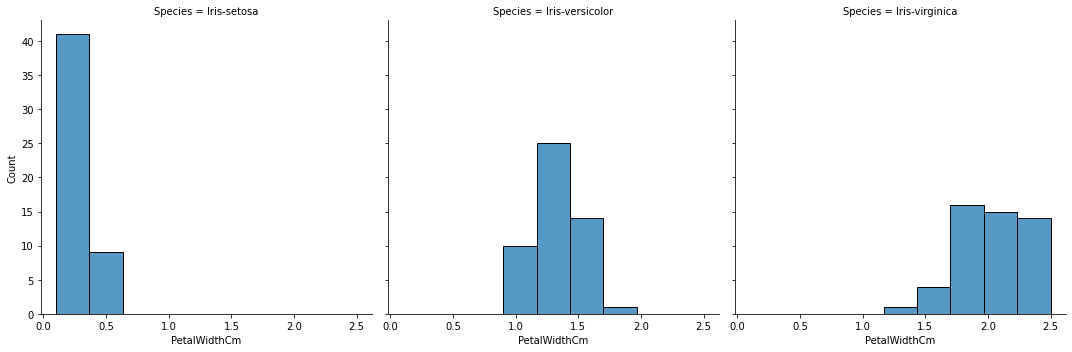

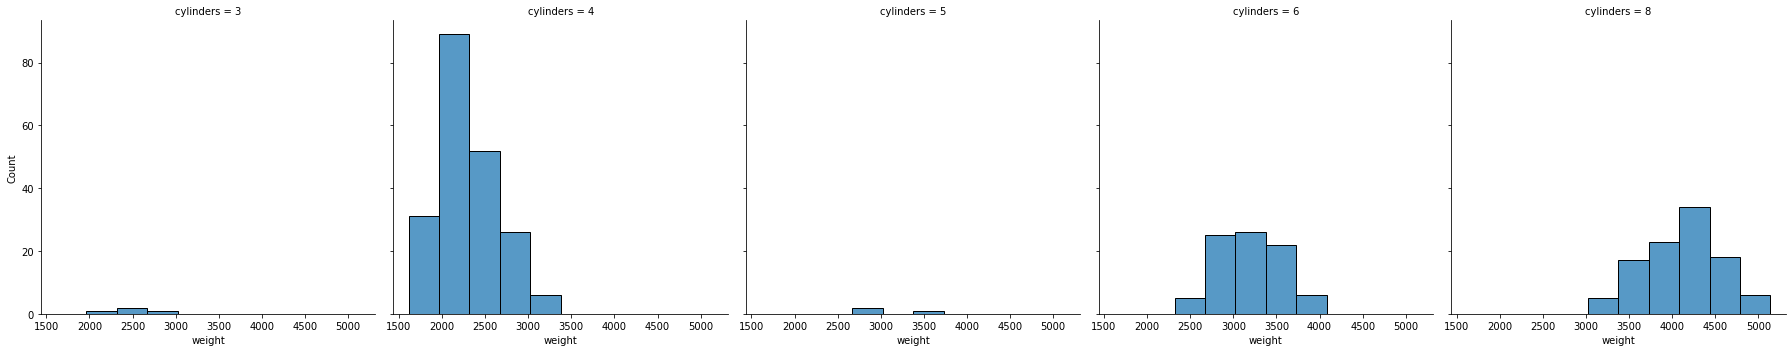

In [28]:
# practice 1 visualize data distribution of PetalWidthCm of flowers for each species
sns.displot(df_iris, x='PetalWidthCm', col = 'Species')

# practice 1 visualize data distribution of Car weight for each cylinders
sns.displot(df_mpg, x='weight', col = 'cylinders')

### Normalized Histogram Statics

Solutions for the observations that subset of the observations has unequal number of observations. By using parameter `stat = density` it will help normalize the counts of observations 

Text(0.5, 1.0, 'Without Stats Density Parameter')

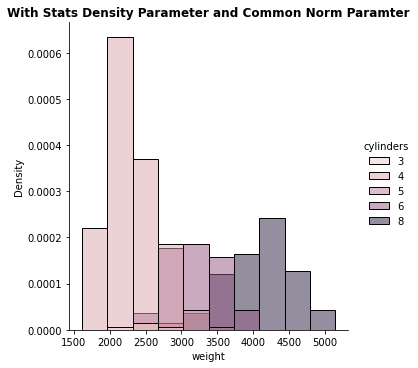

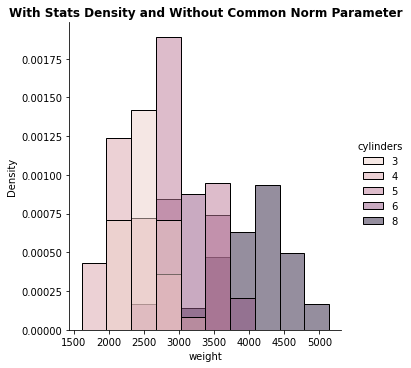

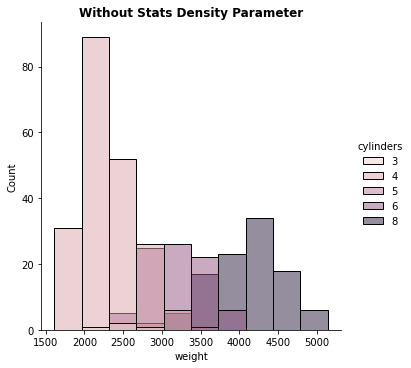

In [5]:
# practice 1 visualize data distribution of PetalWidthCm of flowers for each species
sns.displot(df_mpg, x='weight', hue = 'cylinders', stat='density')
plt.title('With Stats Density Parameter and Common Norm Paramter',  fontweight='bold')

# practice 2 visualize data distribution of PetalWidthCm of flowers for each species
sns.displot(df_mpg, x='weight', hue = 'cylinders', stat='density', common_norm = False)
plt.title('With Stats Density and Without Common Norm Parameter',  fontweight='bold')

# practice 3 visualize data distribution of PetalWidthCm of flowers for each species
sns.displot(df_mpg, x='weight', hue = 'cylinders')
plt.title('Without Stats Density Parameter',  fontweight='bold')


# 2. Kernel Density Estimation (KDE)

A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate. 

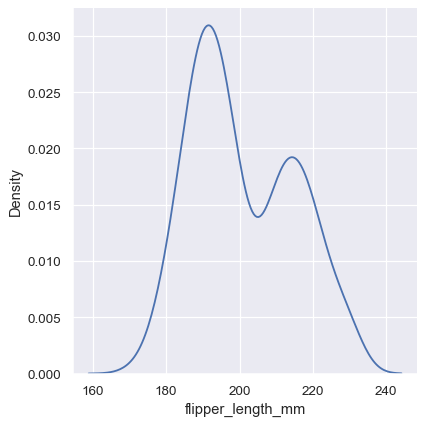
Basic Syntax :
`sns.displot(penguins, x="flipper_length_mm", kind="kde")`

In [30]:
df_iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

#### Basic Kernel Density Estimation

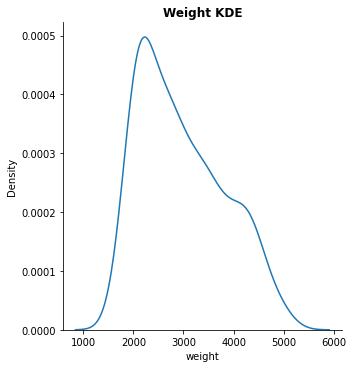

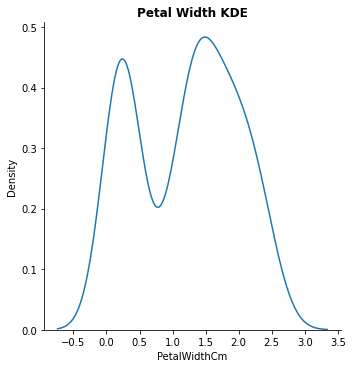

In [33]:
# practice 1
sns.displot(data=df_mpg, x='weight', kind='kde')
plt.title('Weight KDE', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', kind='kde')
plt.title('Petal Width KDE', fontweight='bold')
plt.show()

#### Kernel Density Estimation With Smoothing Settings 

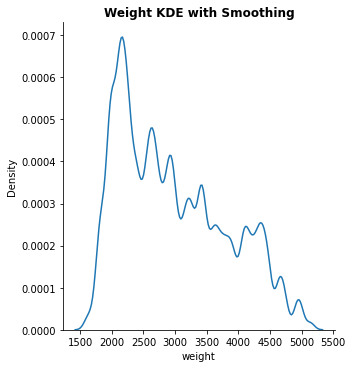

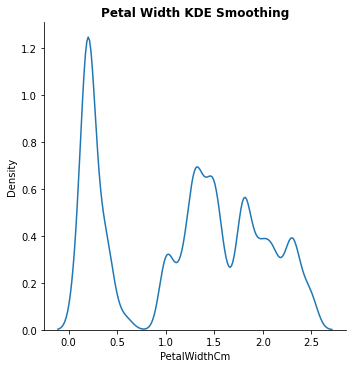

In [35]:
# practice 1
sns.displot(data=df_mpg, x='weight', kind='kde', bw_adjust = .25)
plt.title('Weight KDE with Smoothing', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', kind='kde', bw_adjust = .25)
plt.title('Petal Width KDE Smoothing', fontweight='bold')
plt.show()

At some point, setting our own values for smoothing in KDE is not recommended. Best to let the smoothing values go to default.

#### KDE Conditioning on Other Variables

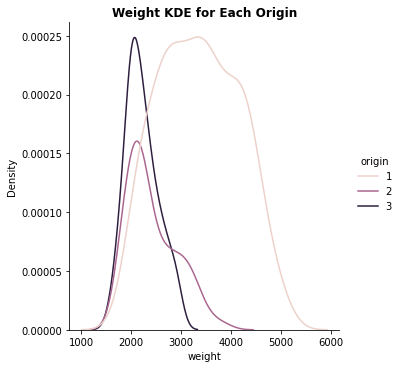

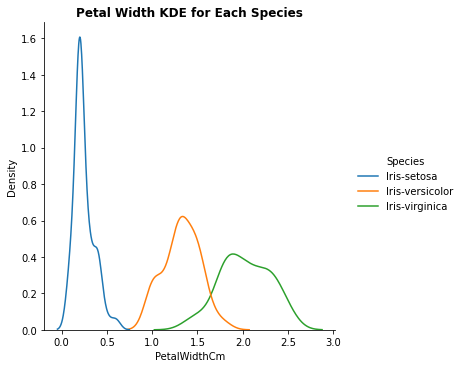

In [37]:
# practice 1
sns.displot(data=df_mpg, x='weight', hue='origin', kind='kde')
plt.title('Weight KDE for Each Origin', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', hue='Species', kind='kde')
plt.title('Petal Width KDE for Each Species', fontweight='bold')
plt.show()

#### Conditioning on Other Variables (Stacked)

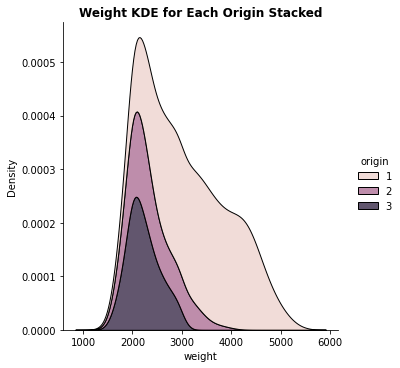

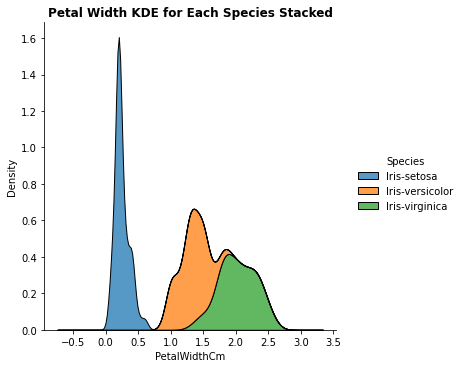

In [38]:
# practice 1
sns.displot(data=df_mpg, x='weight', hue='origin', kind='kde', multiple='stack')
plt.title('Weight KDE for Each Origin Stacked', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', hue='Species', kind='kde', multiple='stack')
plt.title('Petal Width KDE for Each Species Stacked', fontweight='bold')
plt.show()

Sometimes with stacked like visualization above, make more easier to interpret & understand the distribution.

#### Conditioning on Other Variables (Filled)

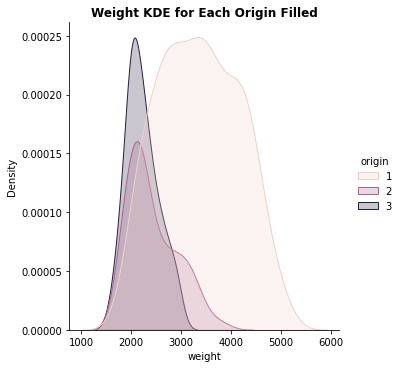

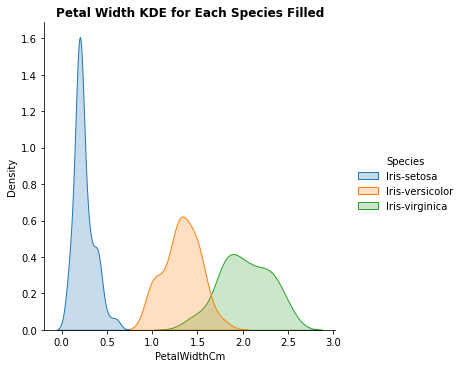

In [40]:
# practice 1
sns.displot(data=df_mpg, x='weight', hue='origin', kind='kde', fill='True')
plt.title('Weight KDE for Each Origin Filled', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', hue='Species', kind='kde', fill='True')
plt.title('Petal Width KDE for Each Species Filled', fontweight='bold')
plt.show()

#### Combining Histogram with KDE at the Same Time  

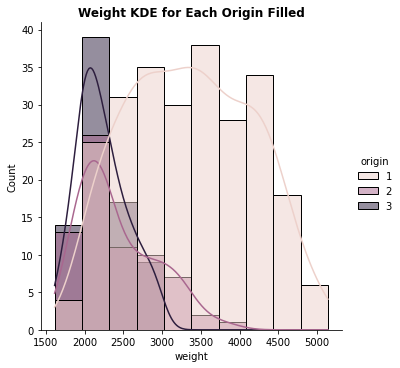

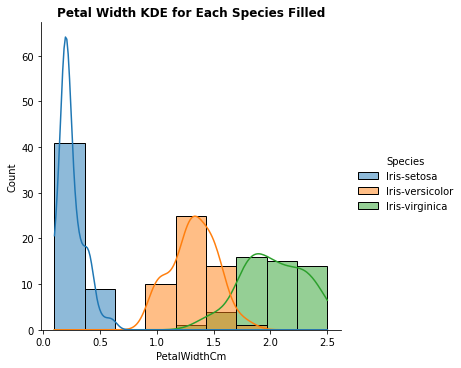

In [41]:
# practice 1
sns.displot(data=df_mpg, x='weight', hue='origin', kde=True)
plt.title('Weight KDE for Each Origin Filled', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', hue='Species', kde=True)
plt.title('Petal Width KDE for Each Species Filled', fontweight='bold')
plt.show()

# 3. Empirical Cumulative Distribution Function (ECDF)

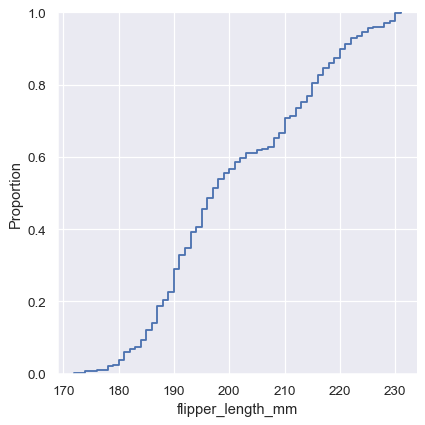


This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value. 

Basic Syntax : 
`sns.displot(penguins, x="flipper_length_mm", kind="ecdf")`

#### Basic Empirical Cumulative Distribution Function

In [47]:
df_mpg.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

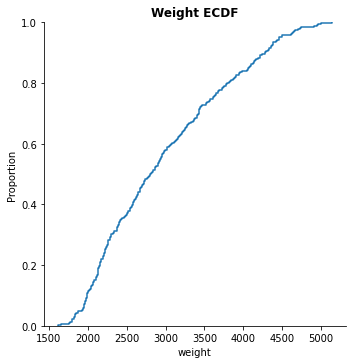

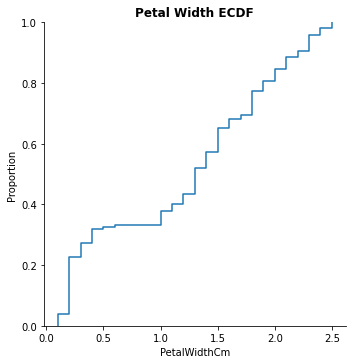

In [45]:
# practice 1
sns.displot(data=df_mpg, x='weight', kind='ecdf')
plt.title('Weight ECDF', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', kind='ecdf')
plt.title('Petal Width ECDF', fontweight='bold')
plt.show()

#### Conditioning on Other Variables (Filled)

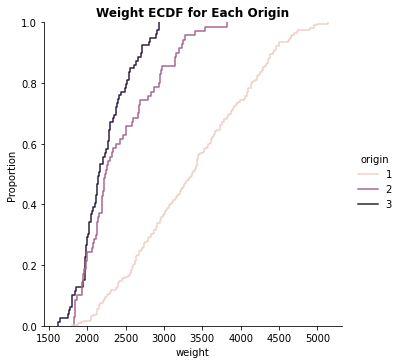

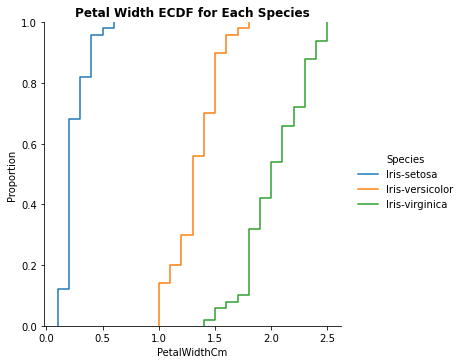

In [49]:
# practice 1
sns.displot(data=df_mpg, x='weight', hue='origin', kind='ecdf')
plt.title('Weight ECDF for Each Origin', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalWidthCm', hue='Species', kind='ecdf')
plt.title('Petal Width ECDF for Each Species', fontweight='bold')
plt.show()

# 4. Visualize Bivariate Distributions 

#### Heatmap

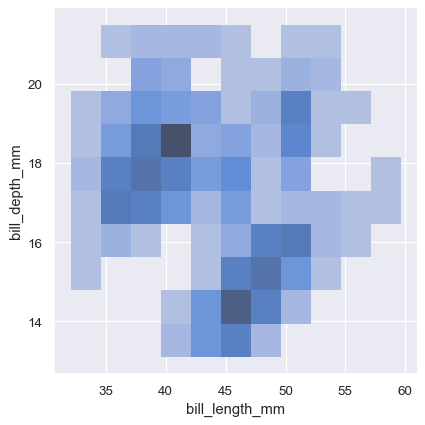
Basic Syntax :
`sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")`

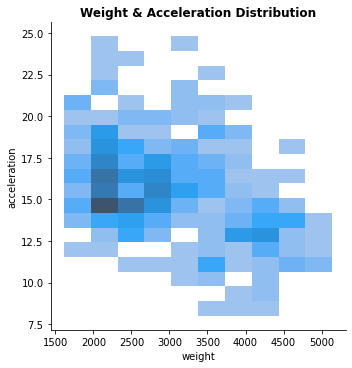

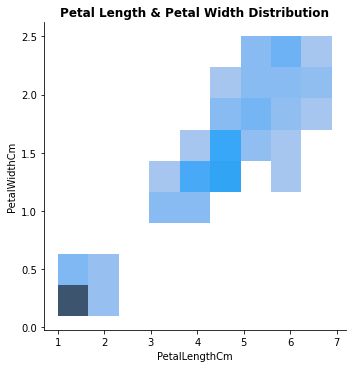

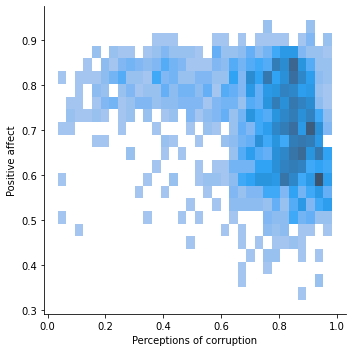

In [8]:
# practice 1
sns.displot(data=df_mpg, x='weight', y='acceleration')
plt.title('Weight & Acceleration Distribution', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalLengthCm', y='PetalWidthCm')
plt.title('Petal Length & Petal Width Distribution', fontweight='bold')
plt.show()

# practice 3
sns.displot(data=df_happ, x='Perceptions of corruption', y='Positive affect')

Not recommend use this visualization to visualize bivariate variables. Much better using scatter plot. 

#### Heatmap (With Categorization)

In [12]:
df_happ.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

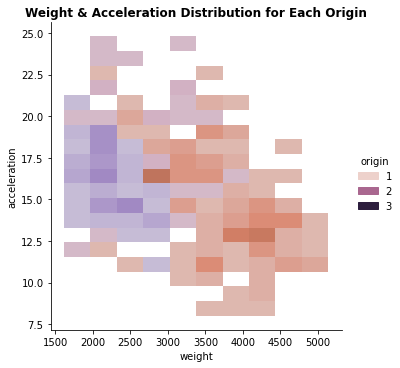

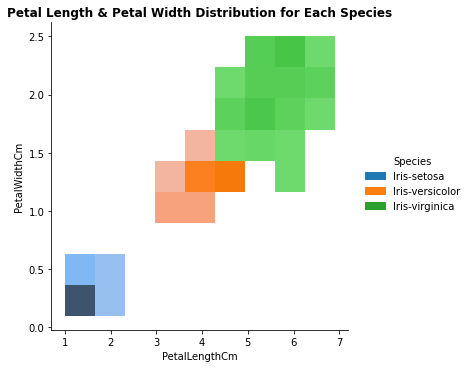

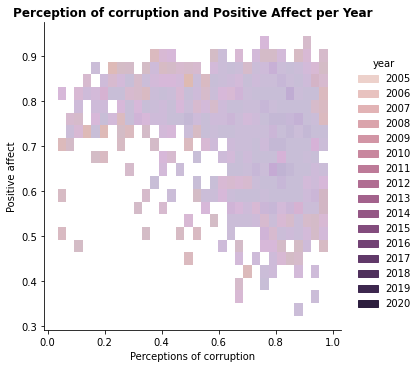

In [14]:
# practice 1
sns.displot(data=df_mpg, x='weight', y='acceleration', hue='origin')
plt.title('Weight & Acceleration Distribution for Each Origin', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Petal Length & Petal Width Distribution for Each Species', fontweight='bold')
plt.show()

# practice 3
sns.displot(data=df_happ, x='Perceptions of corruption', y='Positive affect', hue = 'year')
plt.title('Perception of corruption and Positive Affect per Year', fontweight='bold')
plt.show()

#### Heatmap (With Customization)

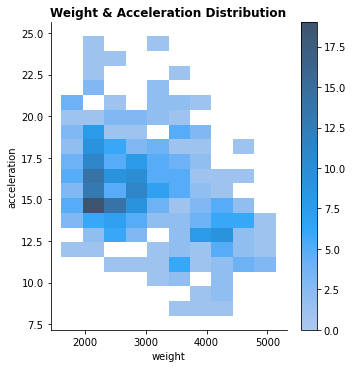

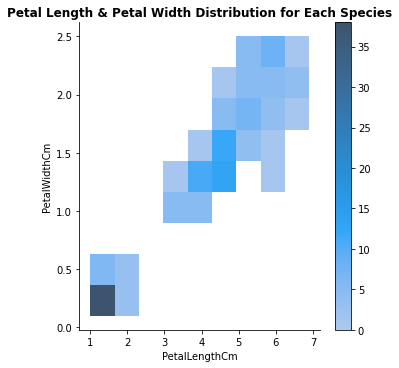

In [18]:
# practice 1
sns.displot(data=df_mpg, x='weight', y='acceleration', cbar=True)
plt.title('Weight & Acceleration Distribution', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalLengthCm', y='PetalWidthCm', cbar=True)
plt.title('Petal Length & Petal Width Distribution', fontweight='bold')
plt.show()

#### Countour

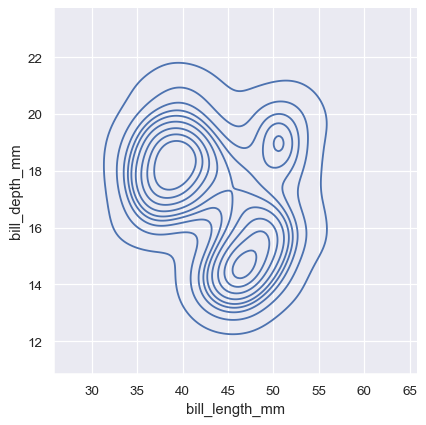
Basic Syntax :
`sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")`

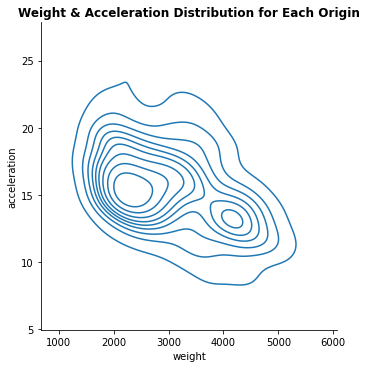

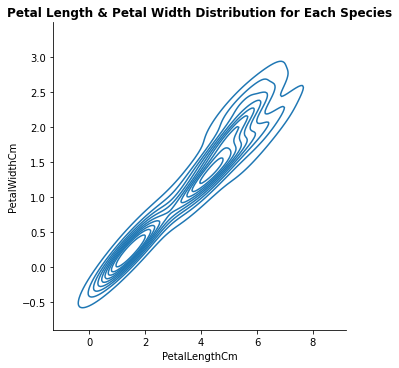

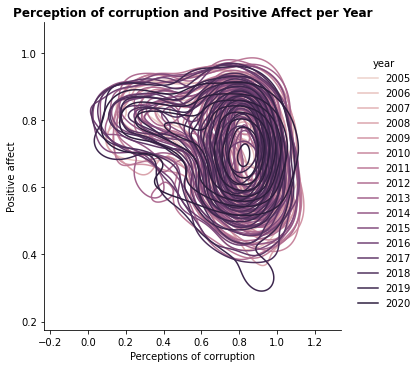

In [19]:
# practice 1
sns.displot(data=df_mpg, x='weight', y='acceleration', kind ='kde')
plt.title('Weight & Acceleration Distribution for Each Origin', fontweight='bold')
plt.show()

# practice 2 
sns.displot(data=df_iris, x='PetalLengthCm', y='PetalWidthCm', kind='kde')
plt.title('Petal Length & Petal Width Distribution for Each Species', fontweight='bold')
plt.show()

# practice 3
sns.displot(data=df_happ, x='Perceptions of corruption', y='Positive affect', hue = 'year', kind='kde')
plt.title('Perception of corruption and Positive Affect per Year', fontweight='bold')
plt.show()

Also Countour not easilye understand by people who see it in the first time

#### Countour ( Categorized )

Made by adding Hue parameter in function. Same as the previous example

# 5. Other Data Distribution

#### Plotting Joint

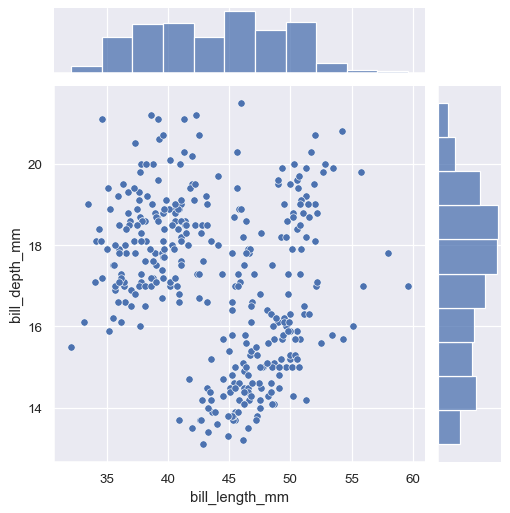

Basic Syntax :
`sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")`

In [20]:
df_mpg.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

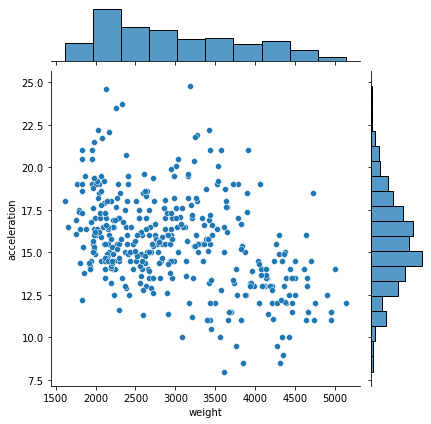

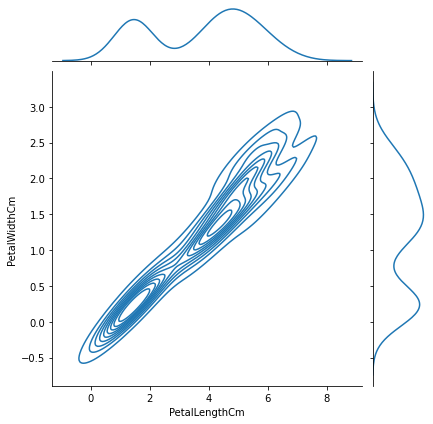

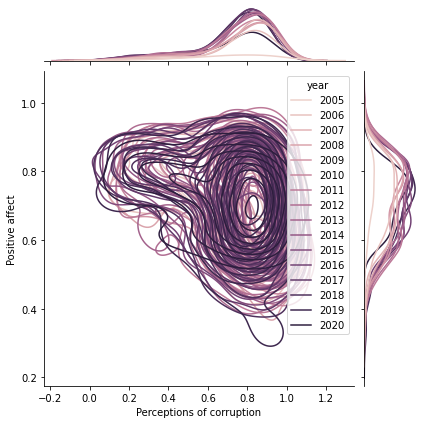

In [22]:
# practice 1
sns.jointplot(data=df_mpg, x='weight', y='acceleration')
plt.show()

# practice 2 
sns.jointplot(data=df_iris, x='PetalLengthCm', y='PetalWidthCm', kind='kde')
plt.show()

# practice 3
sns.jointplot(data=df_happ, x='Perceptions of corruption', y='Positive affect', hue = 'year', kind='kde')
plt.show()

#### Pairwise

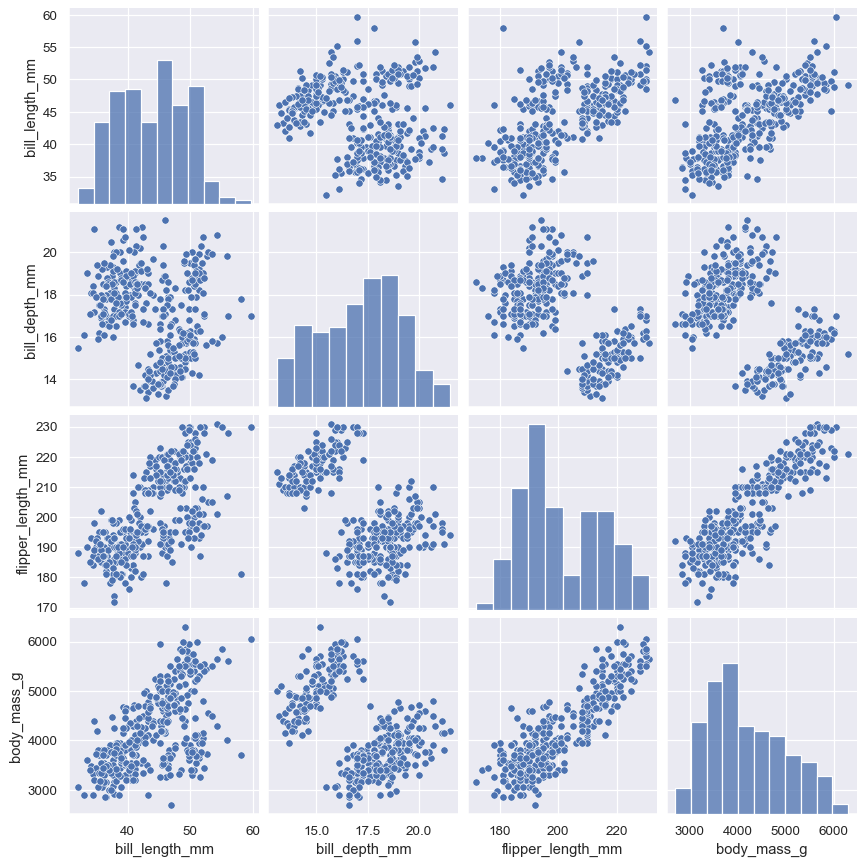

Basic Syntax : 
`sns.pairplot(penguins)`

Text(0.5, 1.0, 'World Happiness Report Dataset Pairwise')

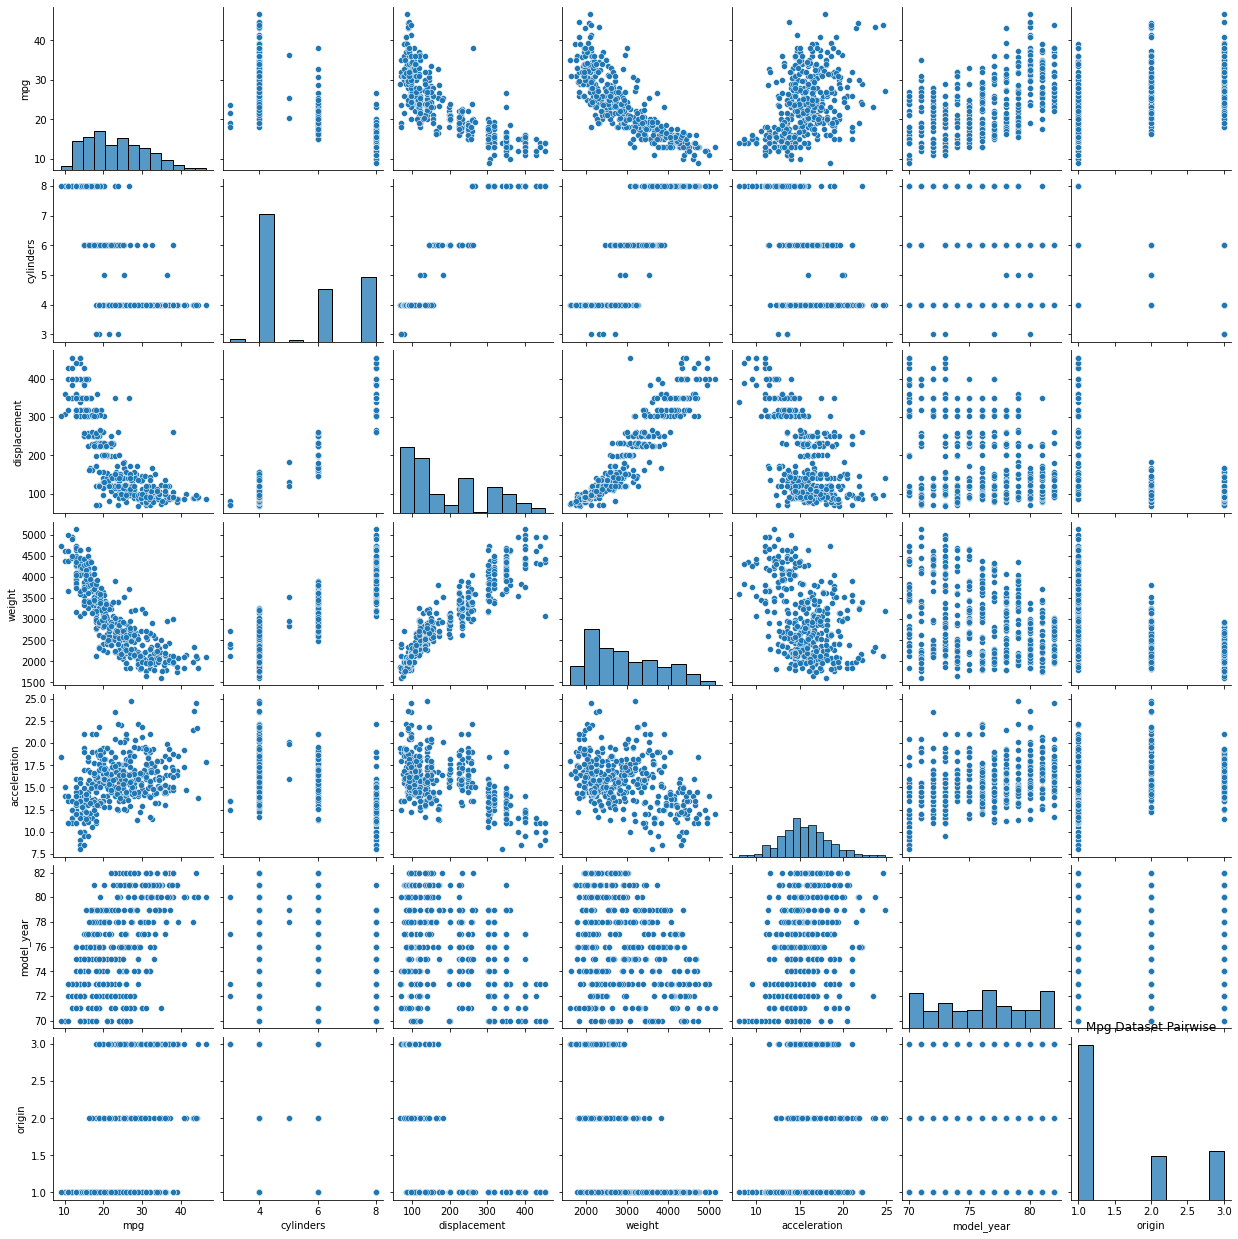

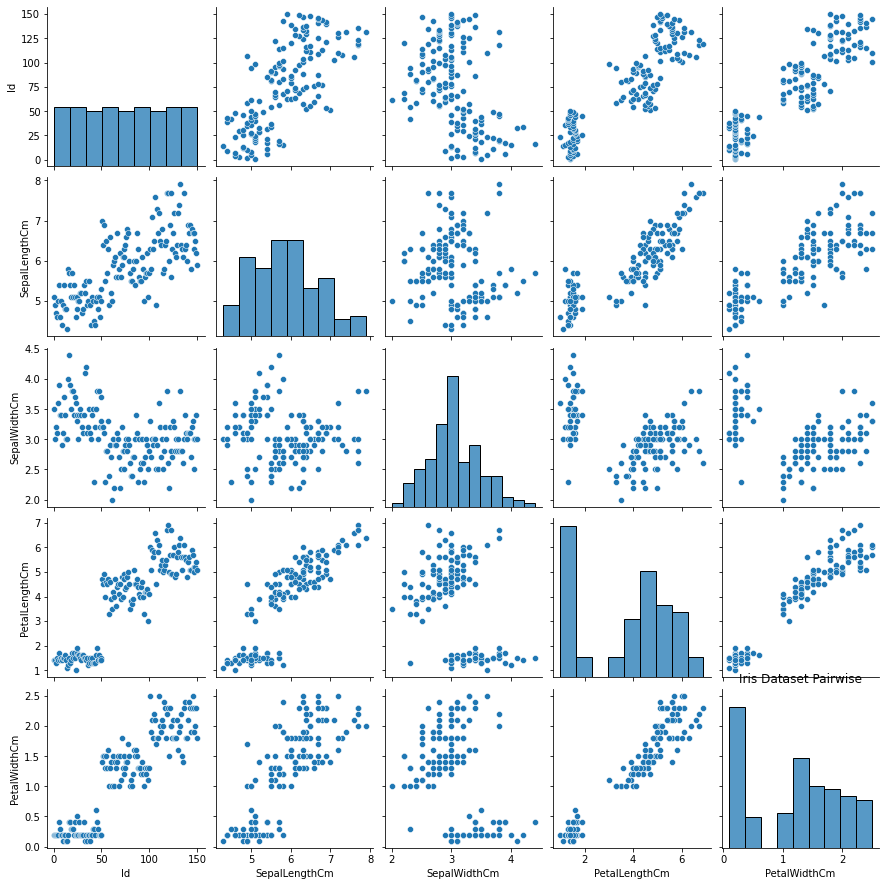

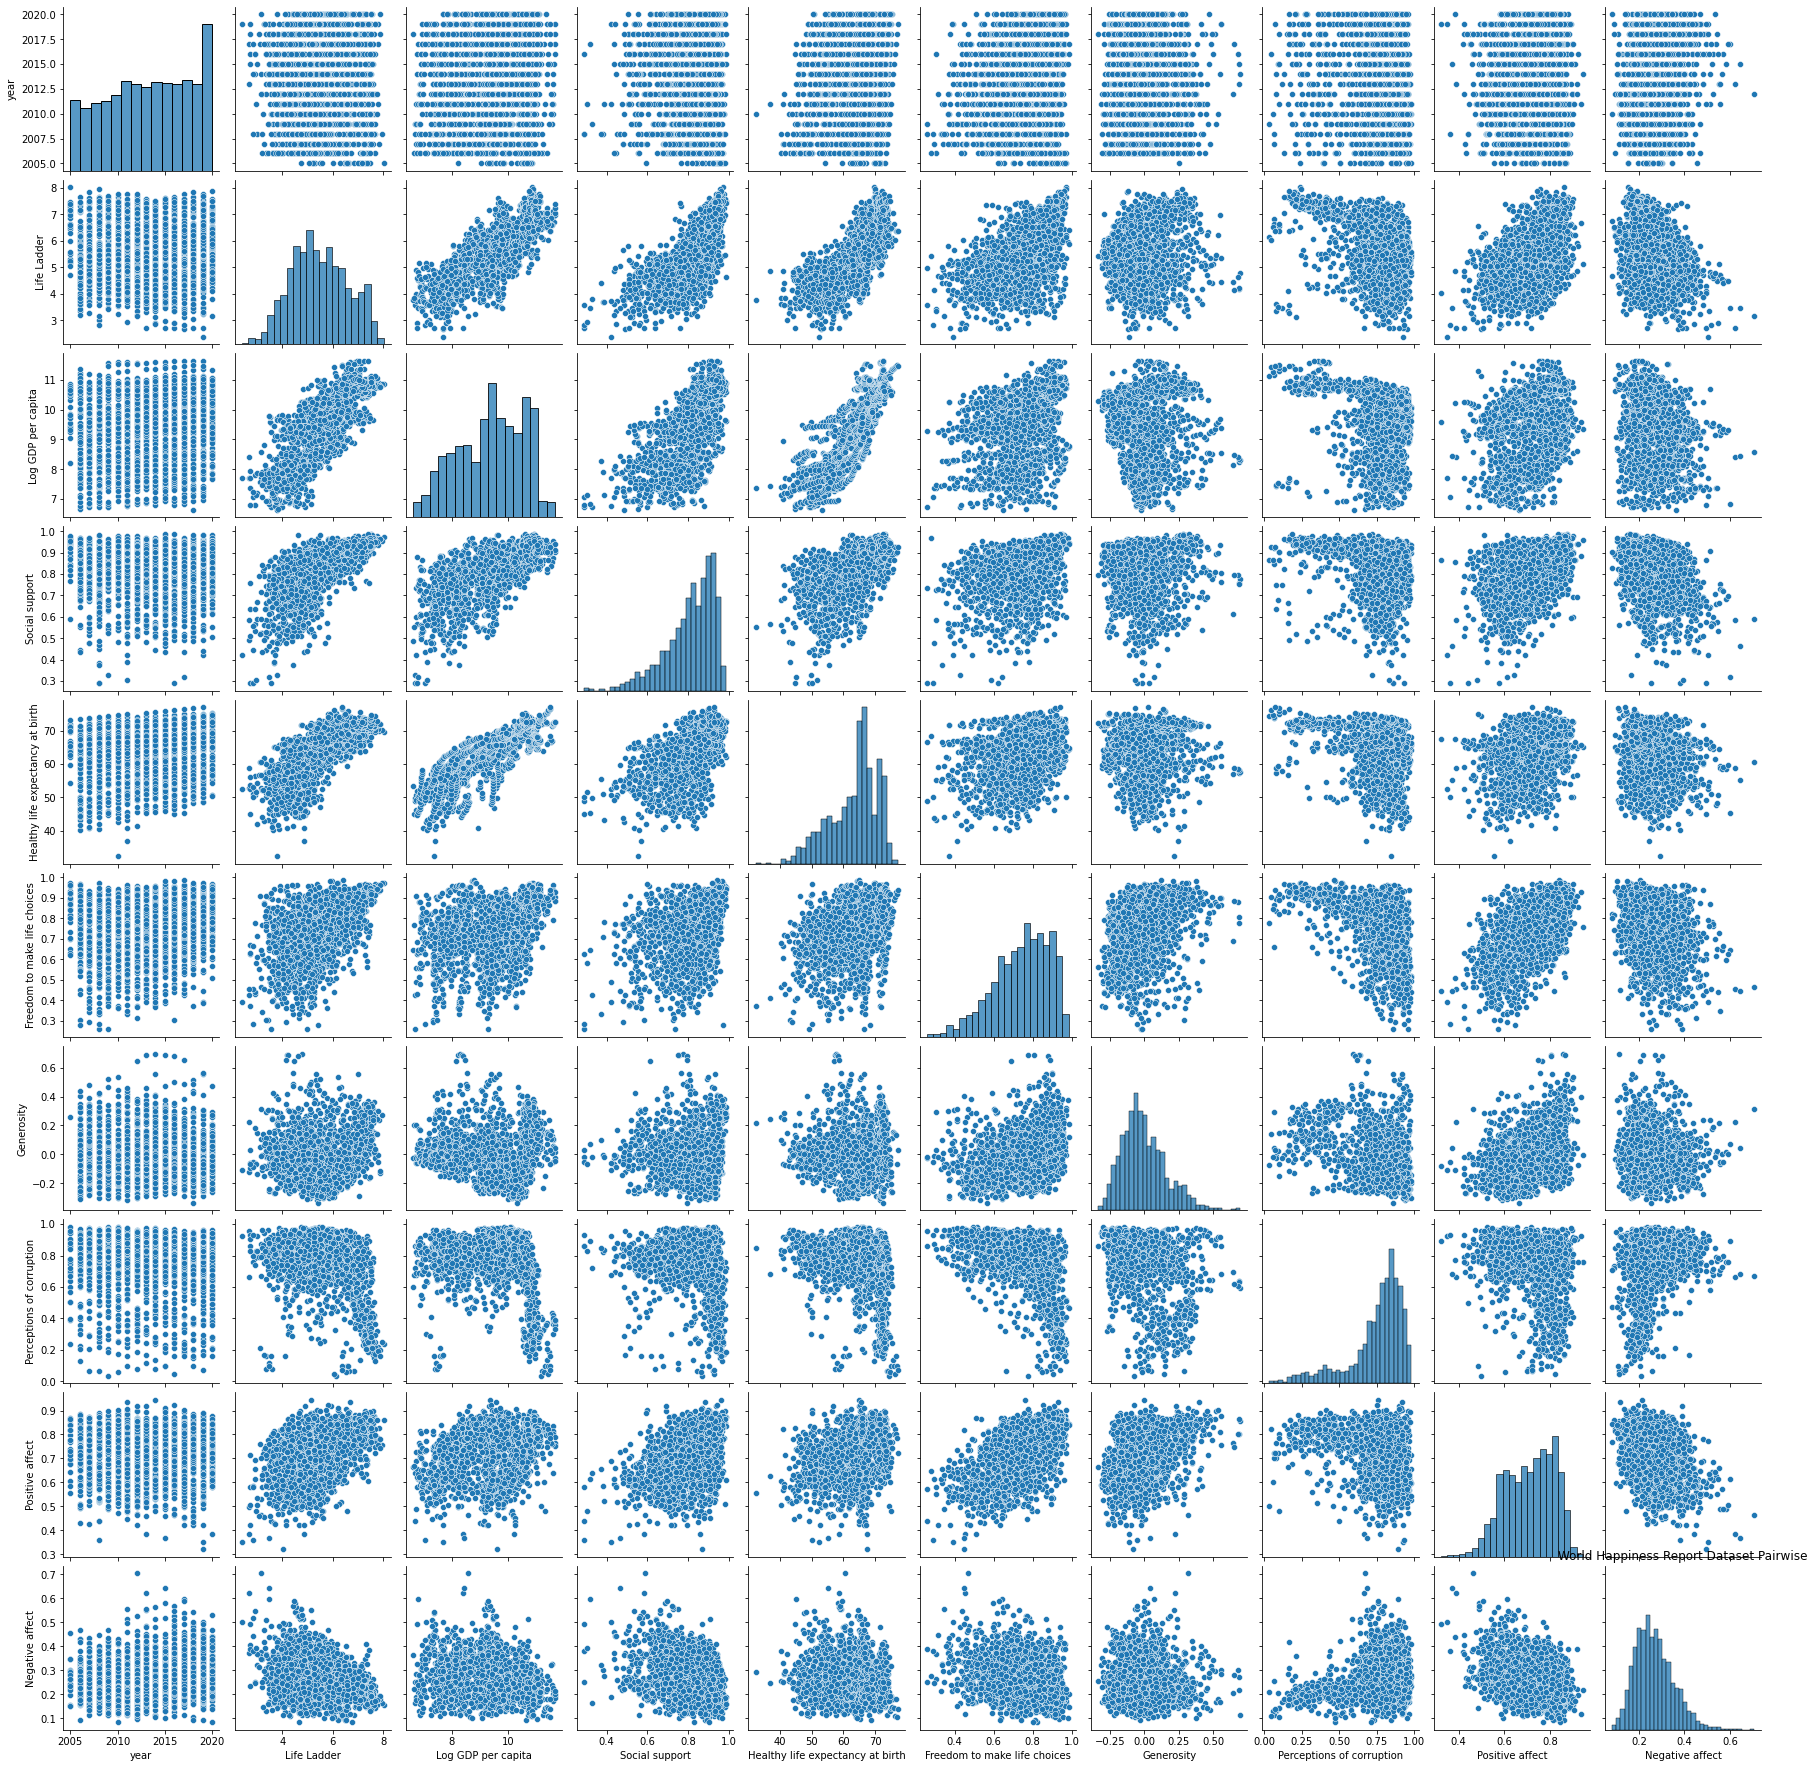

In [24]:
# practice 1
sns.pairplot(df_mpg)

# practice 2
sns.pairplot(df_iris)

# practice 3
sns.pairplot(df_happ)